In [1]:
model_colors =  {
    "RFW": "#1f77b4",          # Blue
    "KNNW": "#ff7f0e",         # Orange
    "DTW": "#2ca02c",          # Green
    "GKW": "#17becf",          # Cyan (new color for GKW)
    "LS_KDEx_LGBM": "#9467bd", # Purple
    "LS_KDEx_MLP": "#8c564b",  # Brown
    "DRF": "#e74c3c",          # Highlighted Red (focused model)
}

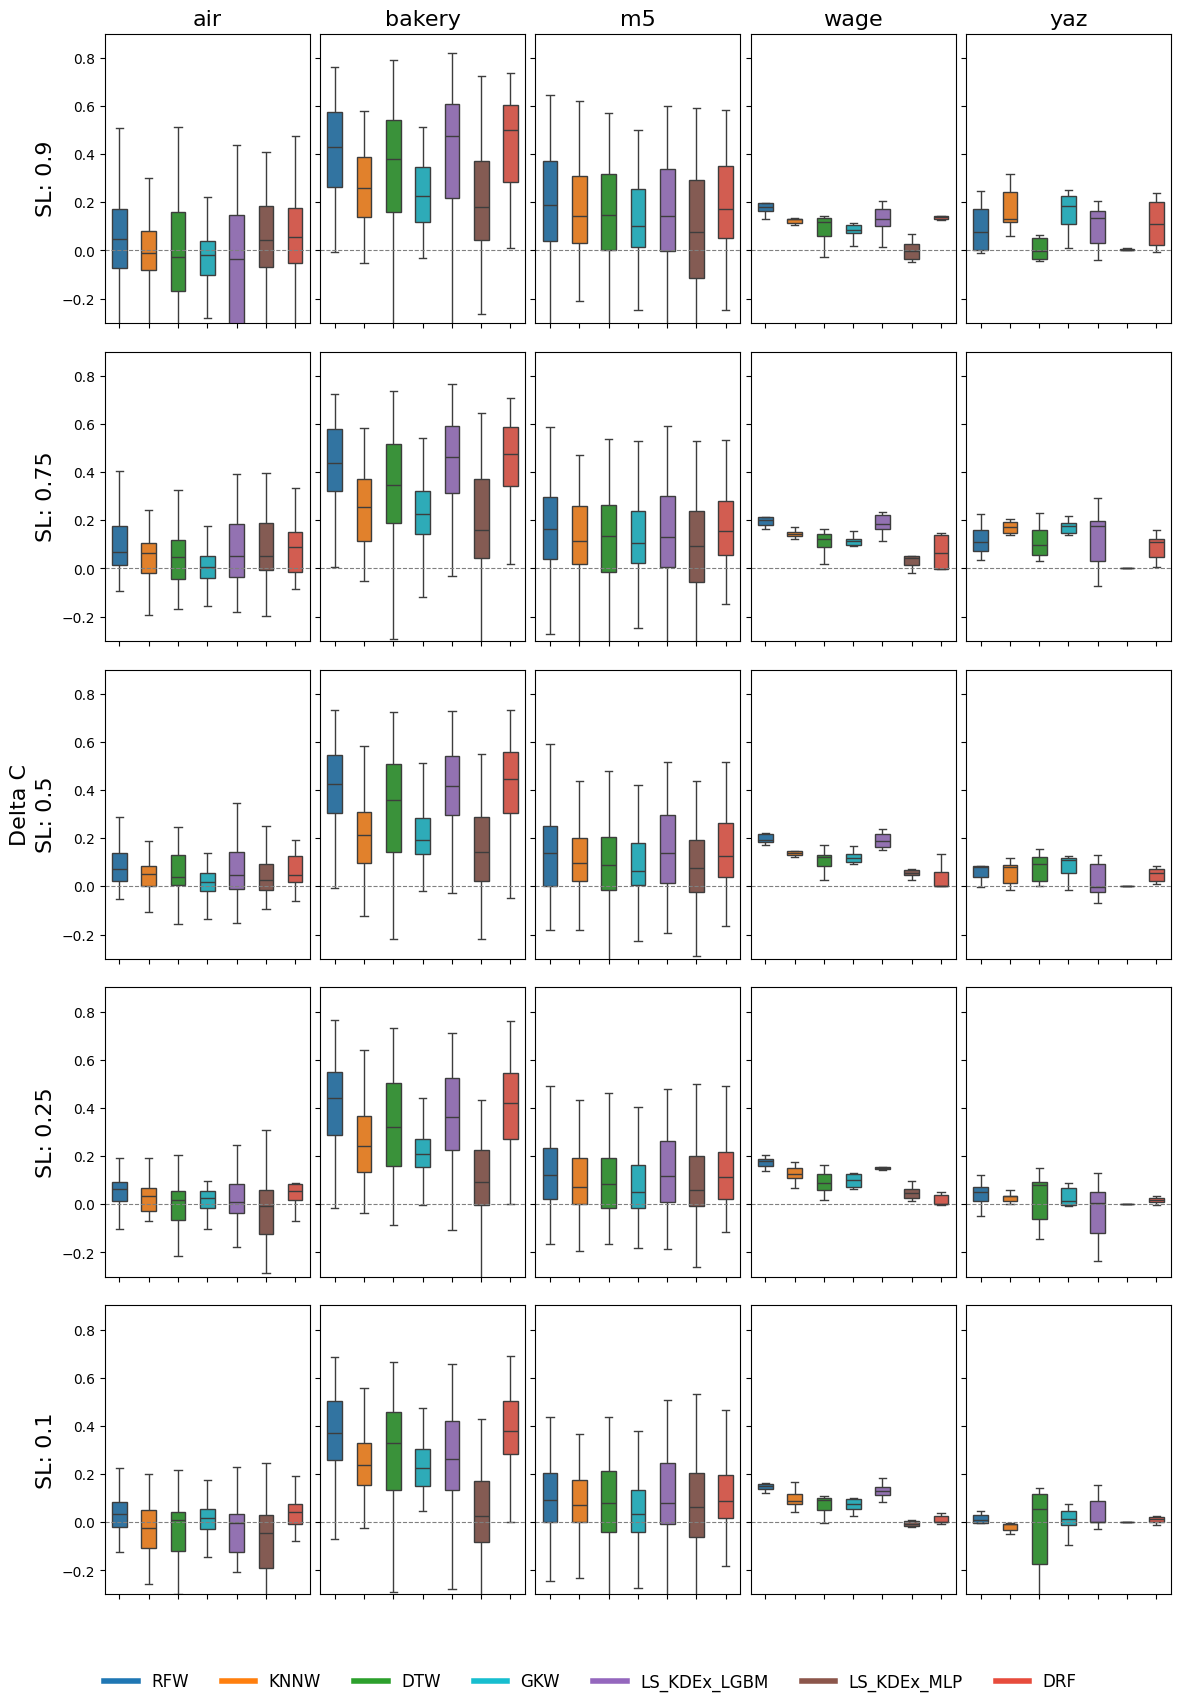

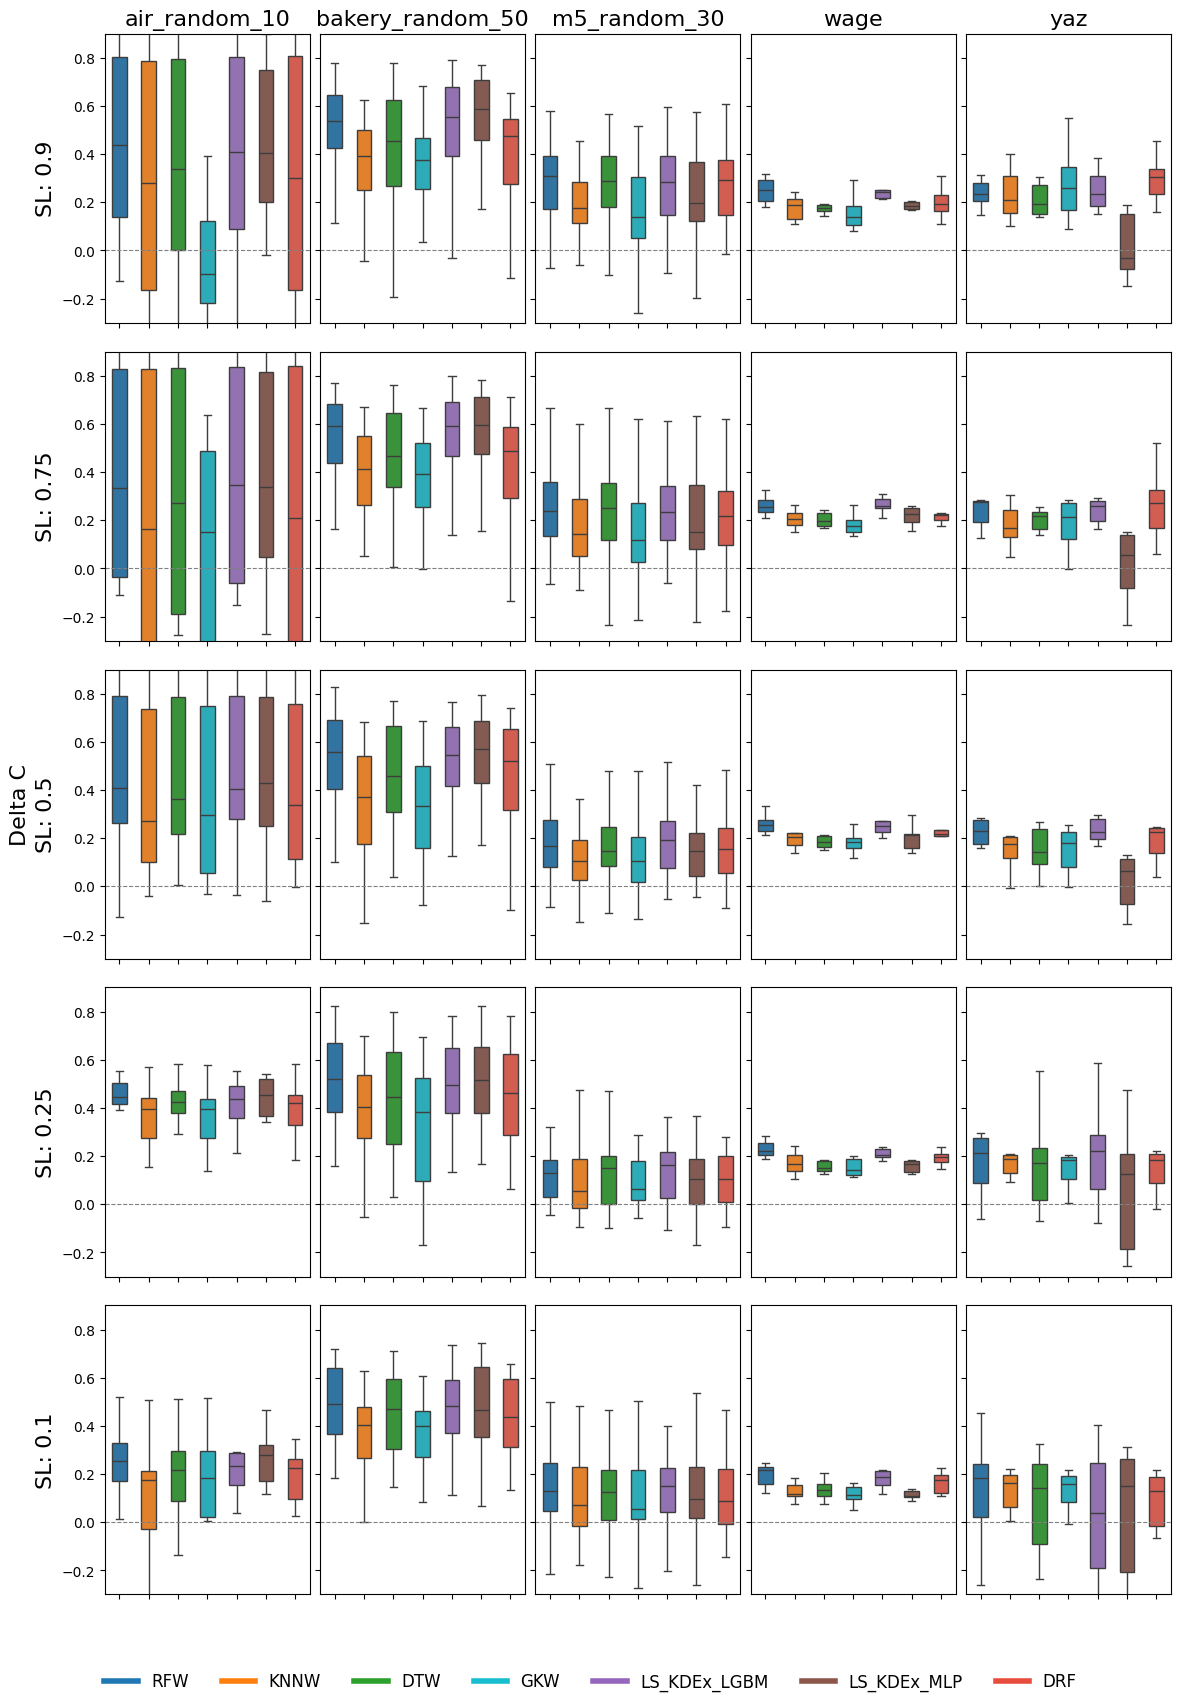

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"
df = pd.read_csv(file_path)

# Exclude specific models
excluded_models = ['SAA', 'MLP', 'LGBM']
filtered_df = df[~df['Model'].isin(excluded_models)]

# Dataset names for both training types
dataset_names = {
    "ID-Based Training": ['air', 'bakery', 'm5', 'wage', 'yaz'],
    "Full Data Training": ['air_random_10', 'bakery_random_50', 'm5_random_30', 'wage', 'yaz']
}

# SL values to consider
sl_values = [0.9, 0.75, 0.5, 0.25, 0.1]

# Extended color palette
model_colors = model_colors

# Unified model order
model_order = ["RFW", "KNNW", "DTW", "GKW", "LS_KDEx_LGBM", "LS_KDEx_MLP", "DRF"]

# Fixed Y-axis ranges
global_y_min = -0.3
global_y_max = 0.9
wage_y_min = -0.1  # Zoomed-in lower bound for wage dataset
wage_y_max = 0.3   # Zoomed-in upper bound for wage dataset

# Iterate over both training types
for training_type, datasets in dataset_names.items():
    num_rows = len(sl_values)
    num_cols = len(datasets)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18), sharex=True, sharey=True)  # Increased height

    for row, sl in enumerate(sl_values):
        for col, dataset in enumerate(datasets):
            ax = axes[row, col]
            # Filter data for the specific dataset, training type, and SL value
            filtered_data = filtered_df[
                (filtered_df['dataset'] == dataset) &
                (filtered_df['training_description'] == training_type) &
                (filtered_df['sl'] == sl)
            ]
            
            sns.boxplot(
                ax=ax, x='Model', y='delta C', data=filtered_data,
                showfliers=False, width=0.5, order=model_order, hue='Model',
                palette=model_colors, dodge=False, legend=False
            )

            # Adjust marker size for points
            for line in ax.lines:
                line.set_markersize(2)

            # Set y-axis range based on dataset
            if dataset == "wage":
                ax.set_ylim(wage_y_min, wage_y_max)  # Zoomed-in range for wage
            else:
                ax.set_ylim(global_y_min, global_y_max)  # Default range for other datasets

            # Add dashed line at y=0
            ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

            # Set dataset title once at the top row
            if row == 0:
                ax.set_title(f'{dataset}', fontsize=16)  # Dataset title
            
            # Add SL description on the y-axis for the leftmost plots
            if col == 0:
                ax.set_ylabel(f'SL: {sl}', fontsize=16)
            else:
                ax.set_ylabel('')

            # Remove "Model" label from the last row
            if row == num_rows - 1:
                ax.set_xlabel('')  # Remove "Model" text from x-axis
            
            # Keep X-axis ticks but remove tick labels
            ax.set_xticks(range(len(model_order)))  # Ensure ticks are present
            ax.set_xticklabels([])  # Remove tick labels

    # Add a global Y-axis label for all plots
    fig.supylabel('Delta C', fontsize=16)

    # Add a legend below the plots
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in model_colors.values()]
    labels = model_colors.keys()
    fig.legend(handles, labels, loc='lower center', ncol=len(model_colors), fontsize=12, frameon=False)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Reduced space between legend and plots
    plt.subplots_adjust(wspace=0.05, hspace=0.1)  # Increased spacing between plots
    plt.show()



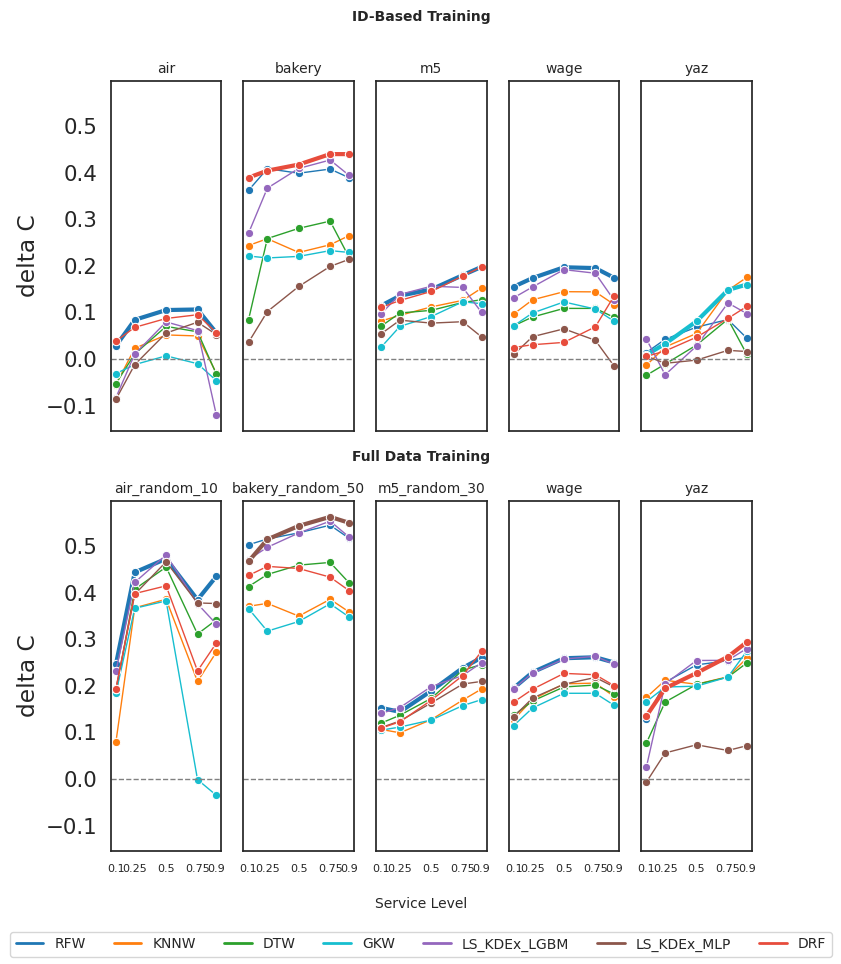

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pfad zur Datei
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"

# CSV-Datei laden
df = pd.read_csv(file_path)

# Modelle ausschließen (Filterung vor der Schleife)
excluded_models = ['SAA', 'MLP', 'LGBM']
filtered_df = df[~df['Model'].isin(excluded_models)]

# Datensätze für beide Training-Typen
dataset_names = {
    "ID-Based Training": ['air', 'bakery', 'm5', 'wage', 'yaz'],
    "Full Data Training": ['air_random_10', 'bakery_random_50', 'm5_random_30', 'wage', 'yaz']
}

# Erweiterte Farbpalette
model_colors = model_colors
# Einheitliche Modellreihenfolge
model_order = ["RFW", "KNNW", "DTW", "GKW", "LS_KDEx_LGBM", "LS_KDEx_MLP", "DRF"]

# Erstelle die Subplots
fig, axes = plt.subplots(2, len(dataset_names["ID-Based Training"]), figsize=(8.27, 10), sharey=True)

# Setze Titel und X-Achsenbeschriftungen korrekt
for row, (training_type, datasets) in enumerate(dataset_names.items()):
    for col, dataset in enumerate(datasets):
        ax = axes[row, col]
        # Filter für spezifisches Dataset und Training-Typ
        filtered_data = filtered_df[
            (filtered_df['dataset'] == dataset) & 
            (filtered_df['training_description'] == training_type)
        ]

        # Bestes Modell für das aktuelle Dataset basierend auf dem Durchschnitt von delta C
        best_model = filtered_data.groupby('Model')['delta C'].mean().idxmax()

        # Linienplot für alle Modelle
        for model in model_order:
            model_data = filtered_data[filtered_data['Model'] == model]
            sns.lineplot(
                ax=ax, data=model_data, x='sl', y='delta C', label=model,
                color=model_colors[model], marker='o', linewidth=3 if model == best_model else 1,
                errorbar=None
            )

        # Füge gestrichelte Linie bei y=0 hinzu
        ax.axhline(0, color='gray', linestyle='--', linewidth=1)

        # Setze Titel für die obere Zeile
        if row == 0:
            ax.set_title(f'{dataset}', fontsize=10)

        # Setze Titel für die untere Zeile, inkl. vollständigem Datensatznamen
        if row == 1:
            mapped_dataset = dataset
            ax.set_title(f'{mapped_dataset}', fontsize=10)

        # Entferne X-Achsenbeschriftung und Ticks für die obere Zeile
        if row == 0:
            ax.set_xticks([])  # Entfernt die X-Achsen-Ticks
            ax.set_xlabel('')  # Entfernt "sl"

        # Setze die X-Achsenpunkte auf spezifische Werte für die untere Zeile
        if row == 1:
            ax.set_xticks([0.1, 0.25, 0.5, 0.75, 0.9])
            ax.set_xticklabels(['0.1', '0.25', '0.5', '0.75', '0.9'], fontsize=8)  # Nur Zahlenwerte
            ax.set_xlabel('')  # Entfernt "sl"
        # Entferne die Legende von den Subplots
        ax.get_legend().remove()

# Globale Legende unterhalb der Grafik
handles = [plt.Line2D([0], [0], color=color, lw=2, label=model) for model, color in model_colors.items()]
fig.legend(handles, model_colors.keys(), loc='lower center', ncol=len(model_colors), fontsize=10, frameon=True)

# Passen Sie den Abstand zwischen den Subplots an
plt.subplots_adjust(hspace=0.2)  # Abstand zwischen den beiden Plot-Reihen

# Untertitel für beide Plots
plt.figtext(0.5, 0.94, 'ID-Based Training', ha='center', fontsize=10, weight='bold')  # Erster Untertitel
plt.figtext(0.5, 0.5, 'Full Data Training', ha='center', fontsize=10, weight='bold')  # Zweiter Untertitel, direkt über dem unteren Plot

# Gemeinsame X-Achsenbeschriftung
fig.supxlabel('Service Level', fontsize=10, y=0.05)  # Position leicht oberhalb der Legende

plt.show()


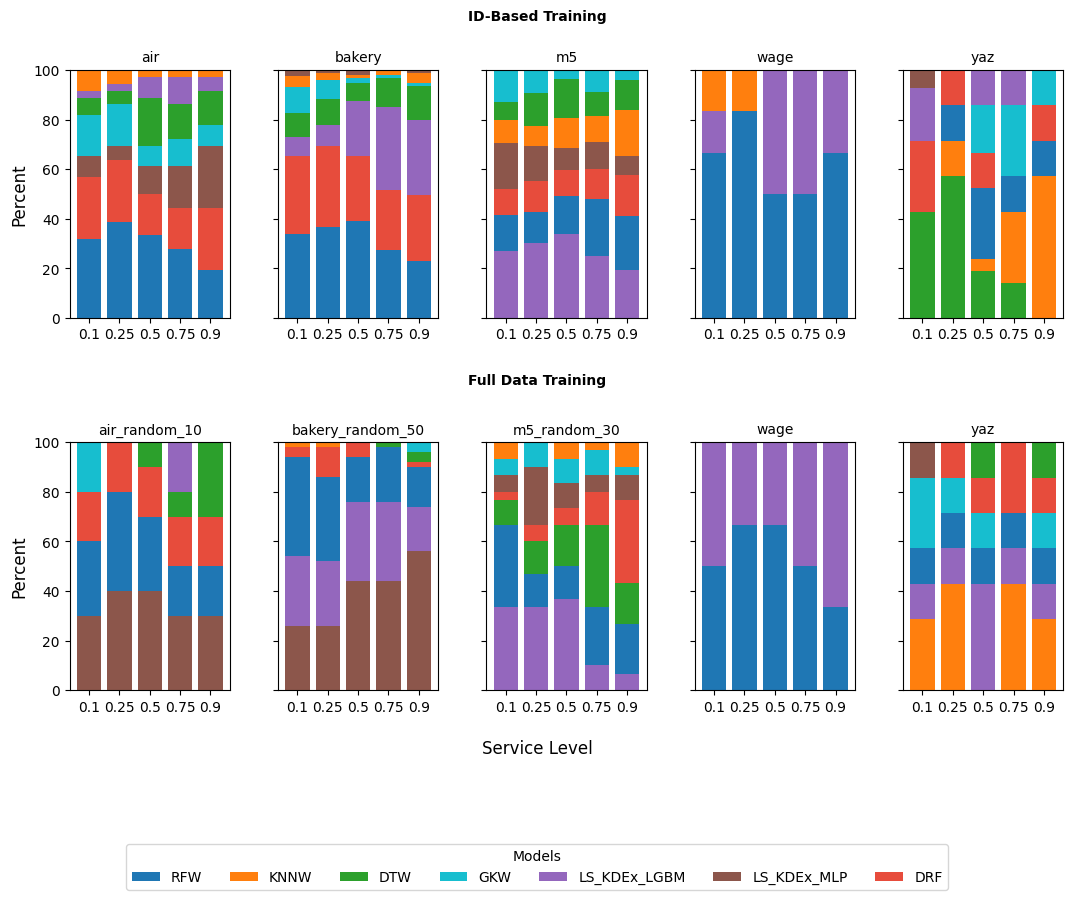

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Ihre bereitgestellte model_colors-Palette
model_colors =  {
    "RFW": "#1f77b4",          # Blue
    "KNNW": "#ff7f0e",         # Orange
    "DTW": "#2ca02c",          # Green
    "GKW": "#17becf",          # Cyan (new color for GKW)
    "LS_KDEx_LGBM": "#9467bd", # Purple
    "LS_KDEx_MLP": "#8c564b",  # Brown
    "DRF": "#e74c3c",          # Highlighted Red (focused model)
}

# Pfad zur CSV-Datei
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"

# Laden der CSV-Datei mit Fehlerbehandlung
try:
    df = pd.read_csv(file_path)
except Exception as e:
    raise SystemExit(f"Fehler beim Laden der CSV-Datei: {e}")

# Überprüfen der Spalten in der CSV-Datei
expected_columns = {'Model', 'training_description', 'dataset', 'sl', 'Variable', 'Pinball Loss'}
if not expected_columns.issubset(df.columns):
    raise SystemExit(f"Fehlende erwartete Spalten. Erwartet: {expected_columns}, Gefunden: {df.columns}")

# Ausschließen bestimmter Modelle
excluded_models = ['SAA', 'MLP', 'LGBM']
filtered_df = df[~df['Model'].isin(excluded_models)]

# Überprüfen der verbleibenden Modelle
remaining_models = filtered_df['Model'].unique()

# Sicherstellen, dass alle verbleibenden Modelle in model_colors definiert sind
for model in remaining_models:
    if model not in model_colors:
        model_colors[model] = 'gray'  # Standardfarbe für nicht definierte Modelle

# Einzigartige Trainingsbeschreibungen
training_descriptions = filtered_df['training_description'].unique()

# Bestimmen der maximalen Anzahl an Datasets pro Trainingsbeschreibung
datasets_per_training = [filtered_df[filtered_df['training_description'] == td]['dataset'].nunique() for td in training_descriptions]
max_datasets = max(datasets_per_training) if datasets_per_training else 0

# Bestimmen der Anzahl der Trainingsbeschreibungen
num_trainings = len(training_descriptions)

# Erstellen einer einzigen Figur mit mehreren Subplots
# Layout: nrows = Anzahl der Trainingsbeschreibungen, ncols = maximale Anzahl der Datasets
# Optimierung für DIN A4: 11.69 x 8.27 inches
fig_width = 11.69
fig_height = 8.27
fig, axes = plt.subplots(nrows=num_trainings, ncols=max_datasets, figsize=(fig_width, fig_height), sharey=True)

# Sicherstellen, dass axes immer ein 2D-Array ist
if num_trainings == 1 and max_datasets == 1:
    axes = np.array([[axes]])
elif num_trainings == 1:
    axes = axes.reshape(1, max_datasets)
elif max_datasets == 1:
    axes = axes.reshape(num_trainings, 1)

# Loop über jede Trainingsbeschreibung
for row_idx, td in enumerate(training_descriptions):
    td_df = filtered_df[filtered_df['training_description'] == td]
    datasets = td_df['dataset'].unique()
    num_datasets = len(datasets)

    for col_idx in range(max_datasets):
        ax = axes[row_idx, col_idx]
        ax.set_title("")

        if col_idx < num_datasets:
            dataset = datasets[col_idx]
            dataset_df = td_df[td_df['dataset'] == dataset]
            service_levels = sorted(dataset_df['sl'].unique())
            variables = dataset_df['Variable'].unique()

            if len(service_levels) == 0 or len(variables) == 0:
                ax.set_visible(False)
                continue

            # Initialisieren eines Dictionaries zur Speicherung der besten Modellanzahlen pro Service Level
            best_model_counts_per_sl = {}
            for sl in service_levels:
                sl_df = dataset_df[dataset_df['sl'] == sl]
                # Initialisieren eines Dictionaries zur Zählung der besten Modelle
                best_model_counts = {model: 0 for model in model_colors.keys()}
                # Loop über jede Variable
                for var in variables:
                    var_df = sl_df[sl_df['Variable'] == var]
                    # Finden des Modells mit dem niedrigsten Pinball Loss
                    if not var_df.empty:
                        min_loss = var_df['Pinball Loss'].min()
                        best_models = var_df[var_df['Pinball Loss'] == min_loss]['Model'].unique()
                        # Bei Gleichstand den Count aufteilen
                        count_increment = 1.0 / len(best_models)
                        for bm in best_models:
                            if bm in best_model_counts:
                                best_model_counts[bm] += count_increment
                # Umwandeln der Counts in Prozentsätze
                total_vars = len(variables)
                for model in best_model_counts:
                    best_model_counts[model] = (best_model_counts[model] / total_vars) * 100
                best_model_counts_per_sl[sl] = best_model_counts

            # Berechnung der Gesamtprozentsätze pro Modell für dieses Dataset
            total_percentages = {model: 0 for model in model_colors.keys()}
            for sl in service_levels:
                for model, perc in best_model_counts_per_sl[sl].items():
                    total_percentages[model] += perc

            # Sortieren der Modelle basierend auf den Gesamtprozentsätzen in absteigender Reihenfolge
            sorted_models = sorted(total_percentages.keys(), key=lambda m: total_percentages[m], reverse=True)

            # Plotten des gestapelten Balkendiagramms für dieses Dataset
            x = np.arange(len(service_levels))  # Positionen auf der x-Achse
            bottoms = np.zeros(len(service_levels))

            # Plotten der Balken in der sortierten Reihenfolge
            for model in sorted_models:
                percentages = [best_model_counts_per_sl[sl][model] for sl in service_levels]
                ax.bar(
                    x,
                    percentages,
                    bottom=bottoms,
                    color=model_colors.get(model, 'gray'),  # Farben immer aus model_colors
                    label=model if (row_idx == 0 and col_idx == 0) else ""  # Nur einmal Label für Legende
                )
                bottoms += percentages

            ax.set_xticks(x)
            ax.set_xticklabels([str(sl) for sl in service_levels])  # Nur den Wert anzeigen
            if col_idx == 0:
                ax.set_ylabel('Percent', fontsize=12)
            ax.set_title(f"{dataset}", fontsize=10)
        else:
            ax.set_visible(False)

# Hinzufügen einer gemeinsamen X-Achsen-Beschriftung
plt.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.95, hspace=0.4, wspace=0.3)
fig.text(0.5, 0.08, 'Service Level', ha='center', va='center', fontsize=12)

# Hinzufügen einer gemeinsamen Legende
handles = [Patch(facecolor=model_colors[model], label=model) for model in model_colors.keys()]
fig.legend(
    handles,
    [model for model in model_colors.keys()],
    title='Models',
    bbox_to_anchor=(0.5, -0.1),  # Position unterhalb der X-Achsen-Beschriftung
    loc='lower center',
    ncol=len(model_colors),
    fontsize=10
)
plt.figtext(0.5, 0.96, 'ID-Based Training', ha='center', fontsize=10, weight='bold')  # Oberer Untertitel
plt.figtext(0.5, 0.52, 'Full Data Training', ha='center', fontsize=10, weight='bold')  # Unterer Untertitel

# Abstand zwischen den Subplots erhöhen
plt.subplots_adjust(hspace=0.5)  # Erhöht den vertikalen Abstand

# Anzeigen des Plots
plt.show()



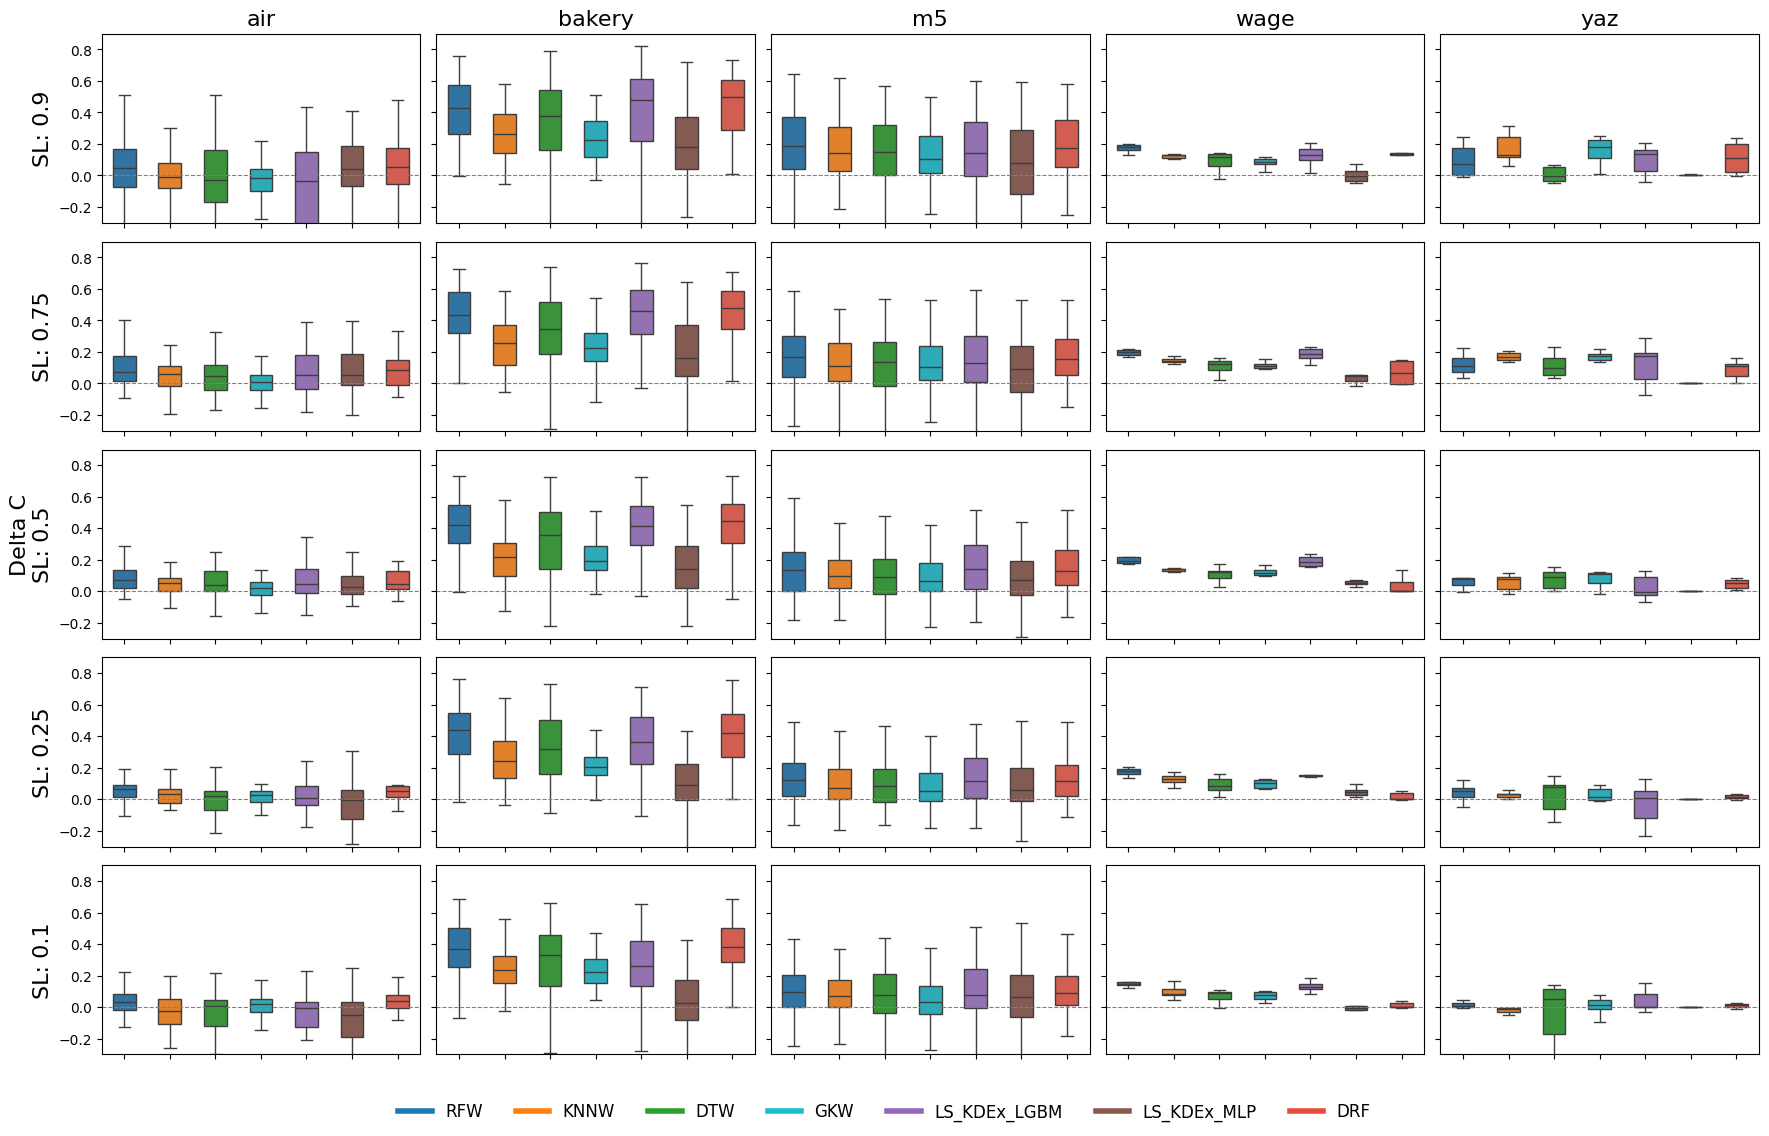

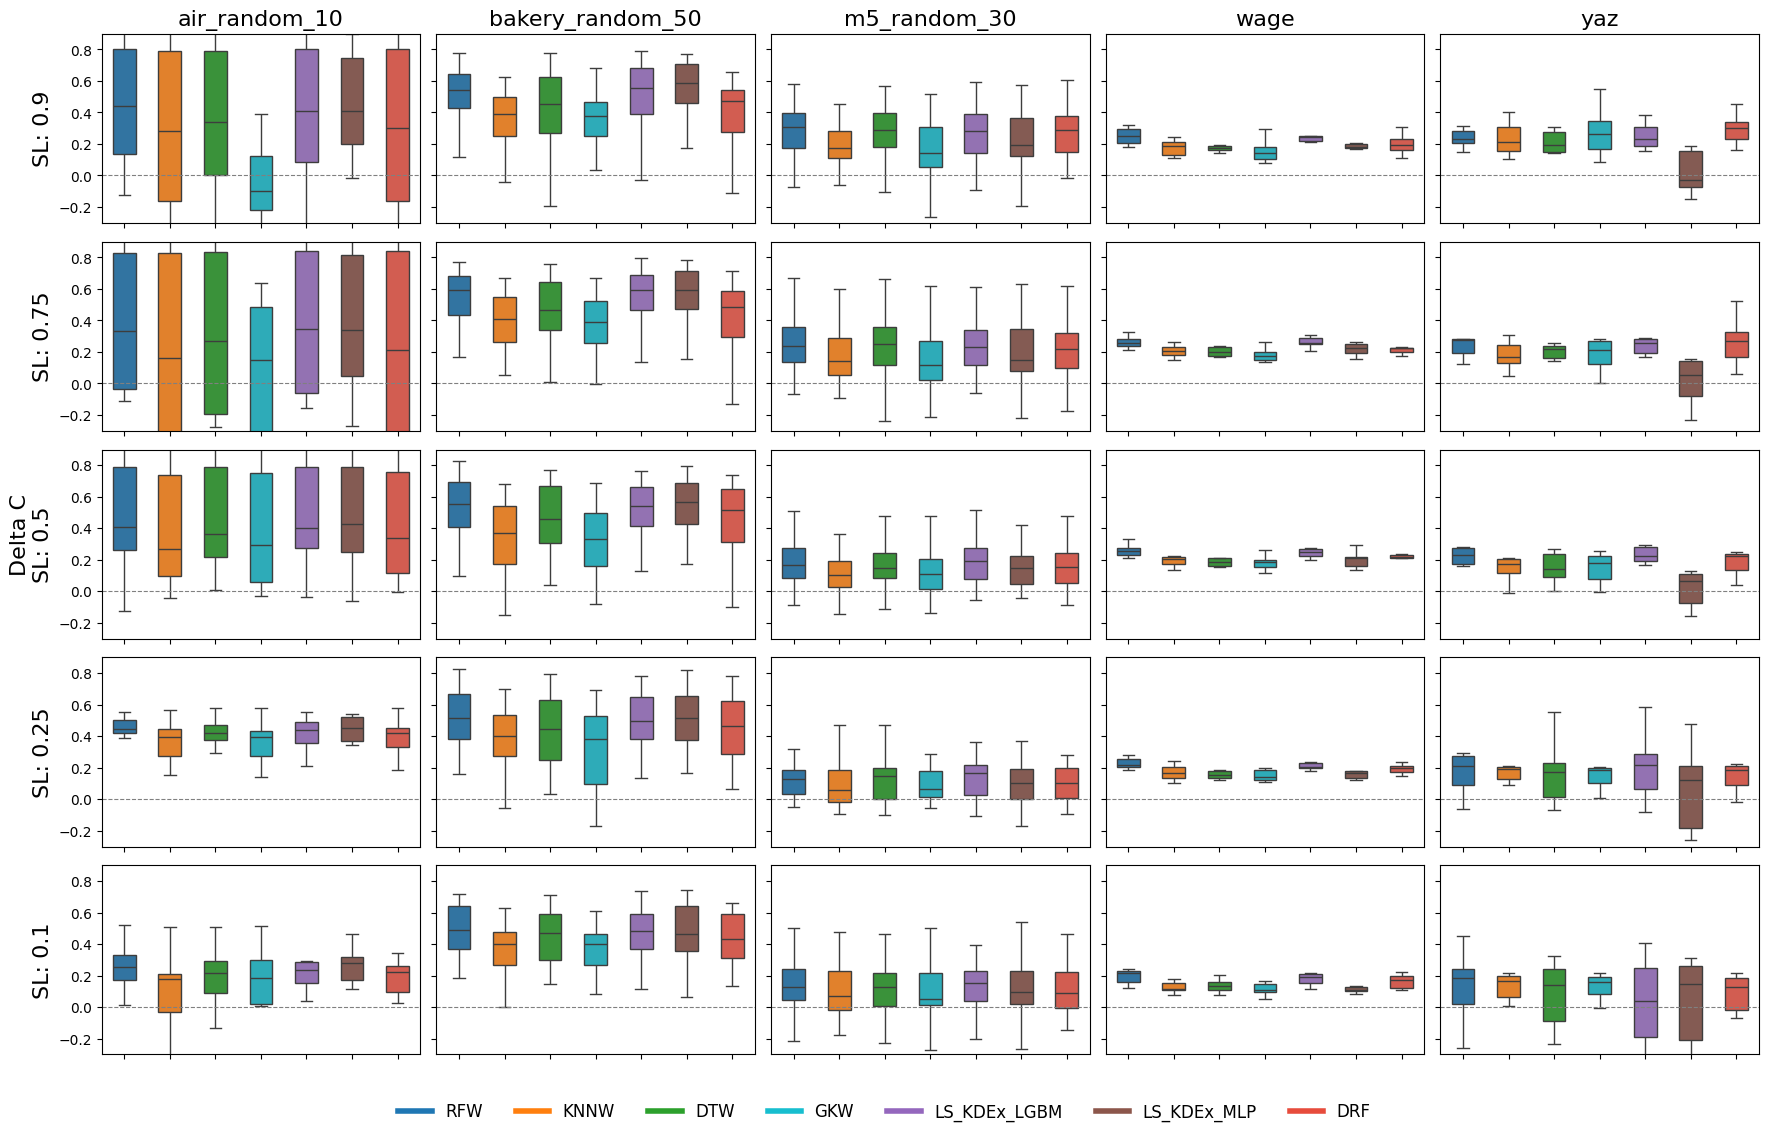

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"
df = pd.read_csv(file_path)

# Exclude specific models
excluded_models = ['SAA', 'MLP', 'LGBM']
filtered_df = df[~df['Model'].isin(excluded_models)]

# Dataset names for both training types
dataset_names = {
    "ID-Based Training": ['air', 'bakery', 'm5', 'wage', 'yaz'],
    "Full Data Training": ['air_random_10', 'bakery_random_50', 'm5_random_30', 'wage', 'yaz']
}

# SL values to consider
sl_values = [0.9, 0.75, 0.5, 0.25, 0.1]

# Extended color palette
model_colors = model_colors

# Unified model order
model_order = ["RFW", "KNNW", "DTW", "GKW", "LS_KDEx_LGBM", "LS_KDEx_MLP", "DRF"]

# Fixed Y-axis ranges
global_y_min = -0.3
global_y_max = 0.9
wage_y_min = -0.1  # Zoomed-in lower bound for wage dataset
wage_y_max = 0.3   # Zoomed-in upper bound for wage dataset

# Iterate over both training types
for training_type, datasets in dataset_names.items():
    num_rows = len(sl_values)
    num_cols = len(datasets)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12), sharex=True, sharey=True)  # Increased height

    for row, sl in enumerate(sl_values):
        for col, dataset in enumerate(datasets):
            ax = axes[row, col]
            # Filter data for the specific dataset, training type, and SL value
            filtered_data = filtered_df[
                (filtered_df['dataset'] == dataset) &
                (filtered_df['training_description'] == training_type) &
                (filtered_df['sl'] == sl)
            ]
            
            sns.boxplot(
                ax=ax, x='Model', y='delta C', data=filtered_data,
                showfliers=False, width=0.5, order=model_order, hue='Model',
                palette=model_colors, dodge=False, legend=False
            )

            # Adjust marker size for points
            for line in ax.lines:
                line.set_markersize(2)

            # Set y-axis range based on dataset
            if dataset == "wage":
                ax.set_ylim(wage_y_min, wage_y_max)  # Zoomed-in range for wage
            else:
                ax.set_ylim(global_y_min, global_y_max)  # Default range for other datasets

            # Add dashed line at y=0
            ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

            # Set dataset title once at the top row
            if row == 0:
                ax.set_title(f'{dataset}', fontsize=16)  # Dataset title
            
            # Add SL description on the y-axis for the leftmost plots
            if col == 0:
                ax.set_ylabel(f'SL: {sl}', fontsize=16)
            else:
                ax.set_ylabel('')

            # Remove "Model" label from the last row
            if row == num_rows - 1:
                ax.set_xlabel('')  # Remove "Model" text from x-axis
            
            # Keep X-axis ticks but remove tick labels
            ax.set_xticks(range(len(model_order)))  # Ensure ticks are present
            ax.set_xticklabels([])  # Remove tick labels

    # Add a global Y-axis label for all plots
    fig.supylabel('Delta C', fontsize=16)

    # Add a legend below the plots
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in model_colors.values()]
    labels = model_colors.keys()
    fig.legend(handles, labels, loc='lower center', ncol=len(model_colors), fontsize=12, frameon=False)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Reduced space between legend and plots
    plt.subplots_adjust(wspace=0.05, hspace=0.1)  # Increased spacing between plots
    plt.show()

In [6]:
import pandas as pd

# Liste auszuschließender Modelle
excluded_models = ['MLP', 'LGBM']

# Daten für Modell-Ergebnisse laden und filtern
results_file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/results_combined_allDatasets.csv"

model_results = pd.read_csv(results_file_path)
model_results = model_results[~model_results['Model'].isin(excluded_models)]

# Spalte 'Model' in 'model_name' umbenennen
model_results.rename(columns={'Model': 'model_name'}, inplace=True)
model_results.rename(columns={'Variable': 'variable'}, inplace=True)

display(model_results)
# Daten für Modell-Ergebnisse laden und filtern
results_file_path = "/workspaces/Masterthesis-DRF/results/aggregated_results/crossValidation_results_allDatasets.csv"

cv_results = pd.read_csv(results_file_path)
cv_results = cv_results[~cv_results['model_name'].isin(excluded_models)]
cv_results.rename(columns={'tau': 'sl'}, inplace=True)

cv_results_raw = cv_results

# Identify the split columns
split_columns = [col for col in cv_results.columns if col.startswith('split') and '_test_score' in col]

# Multiply all split columns by -1 for rows where model_type is 'levelset_models'
cv_results_raw.loc[cv_results['model_name'] == 'DRF', 'model_type'] = 'basic_models'
cv_results_raw.loc[cv_results['model_type'] == 'levelset_models', split_columns] *= -1


display(cv_results_raw)



,variable,cu,co,model_name,Pinball Loss,Best Params,delta C,sl,dataset,training_description
0,Location_1_max_CO,9.0,1.0,SAA,0.088849,NaN,NaN,0.9,air,ID-Based Training
3,Location_1_max_CO,9.0,1.0,RFW,0.109210,"OrderedDict([('max_depth', 8), ('max_features'...",-0.229163,0.9,air,ID-Based Training
4,Location_1_max_CO,9.0,1.0,KNNW,0.140335,"OrderedDict([('n_neighbors', 128)])",-0.579482,0.9,air,ID-Based Training
5,Location_1_max_CO,9.0,1.0,DTW,0.138488,"OrderedDict([('max_depth', 6), ('min_samples_s...",-0.558693,0.9,air,ID-Based Training
6,Location_1_max_CO,9.0,1.0,GKW,0.132388,"OrderedDict([('kernel_bandwidth', 1.5)])",-0.490041,0.9,air,ID-Based Training
...,...,...,...,...,...,...,...,...,...,...
17347,fish,1.0,9.0,LS_KDEx_MLP,0.032095,"{'binSize': 1000, 'weightsByDistance': False}",-0.619814,0.1,yaz,Full Data Training
17348,koefte,1.0,9.0,LS_KDEx_MLP,0.020352,"{'binSize': 1000, 'weightsByDistance': False}",0.241680,0.1,yaz,Full Data Training
17349,lamb,1.0,9.0,LS_KDEx_MLP,0.022566,"{'binSize': 1000, 'weightsByDistance': False}",0.149625,0.1,yaz,Full Data Training
17350,shrimp,1.0,9.0,LS_KDEx_MLP,0.027005,"{'binSize': 1000, 'weightsByDistance': False}",-0.280237,0.1,yaz,Full Data Training


,model_name,cu,co,variable,sl,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,dataset,training_description,model_type,hyperparameter
0,LS_KDEx_LGBM,1.0,9.0,Location_1_max_CO,0.1,-0.764092,-0.651639,-0.609375,-0.798535,-0.706927,air,ID-Based Training,levelset_models,"{'param_binSize': 20.0, 'param_weightsByDistan..."
1,LS_KDEx_LGBM,1.0,9.0,Location_1_max_NO2,0.1,-0.987536,-0.961502,-0.777616,-0.955837,-0.871928,air,ID-Based Training,levelset_models,"{'param_binSize': 20.0, 'param_weightsByDistan..."
2,LS_KDEx_LGBM,1.0,9.0,Location_1_max_O3,0.1,-0.813612,-0.706799,-0.683918,-1.359494,-1.006182,air,ID-Based Training,levelset_models,"{'param_binSize': 20.0, 'param_weightsByDistan..."
3,LS_KDEx_LGBM,1.0,9.0,Location_1_max_PM10,0.1,-0.799842,-0.893143,-0.796496,-0.834180,-0.901941,air,ID-Based Training,levelset_models,"{'param_binSize': 20.0, 'param_weightsByDistan..."
4,LS_KDEx_LGBM,1.0,9.0,Location_1_max_PM2.5,0.1,-0.840553,-0.891214,-0.850004,-1.040120,-0.926806,air,ID-Based Training,levelset_models,"{'param_binSize': 20.0, 'param_weightsByDistan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406705,DRF,1.0,9.0,dummyID,0.1,-0.153080,-0.172690,-0.160152,-0.187802,-0.160530,yaz,Full Data Training,basic_models,"{'param_min_node_size': 128.0, 'param_num_feat..."
406706,DRF,1.0,9.0,dummyID,0.1,-0.137637,-0.161119,-0.154333,-0.175216,-0.151331,yaz,Full Data Training,basic_models,"{'param_min_node_size': 32.0, 'param_num_featu..."
406707,DRF,1.0,9.0,dummyID,0.1,-0.139674,-0.157154,-0.148969,-0.172815,-0.153373,yaz,Full Data Training,basic_models,"{'param_min_node_size': 32.0, 'param_num_featu..."
406708,DRF,1.0,9.0,dummyID,0.1,-0.132174,-0.158939,-0.150274,-0.166776,-0.147638,yaz,Full Data Training,basic_models,"{'param_min_node_size': 4.0, 'param_num_featur..."


In [7]:
# Kopieren der rohen CV-Ergebnisse
cv_results = cv_results_raw.copy()

# Berechnung des mean_test_score
cv_results['mean_test_score'] = cv_results[
    [col for col in cv_results.columns if col.startswith('split') and '_test_score' in col]
].mean(axis=1)

# Auswahl relevanter Spalten
cv_results = cv_results[['mean_test_score', 'dataset', 'training_description',
                         'variable', 'model_name', 'sl', 'hyperparameter']]

# Definieren der Datensätze basierend auf den Trainingsbeschreibungen
dataset_names = {
    "ID-Based Training": ['air', 'bakery', 'm5', 'wage', 'yaz'],
    "Full Data Training": ['air_random_10', 'bakery_random_50', 'm5_random_30', 'wage', 'yaz']
}

# Initialisiere die Endtabelle
final_best_models = pd.DataFrame()

# Verarbeitung je Training Description
for training_desc, datasets in dataset_names.items():
    # Filtere die Daten für die aktuelle Trainingsbeschreibung
    filtered_cv_results = cv_results[
        (cv_results['training_description'] == training_desc) &
        (cv_results['dataset'].isin(datasets))
    ]
    
    # Auswahl der besten Modelle pro Parameter-Gitter
    best_model_per_grid = filtered_cv_results.loc[
        filtered_cv_results.groupby(["dataset", "variable", "model_name", "sl"])["mean_test_score"].idxmax()
    ]

    # Rangordnung der besten Modelle
    best_model_per_grid["rank"] = best_model_per_grid.groupby(
        ["dataset", "variable", "sl"]
    )["mean_test_score"].rank("min", ascending=False)

    # Auswahl der besten Modelle pro Kombination
    best_cv_model_per_group = best_model_per_grid.loc[
        best_model_per_grid.groupby(["dataset", "variable", "sl"])["mean_test_score"].idxmax()
    ]

    # Hinzufügen zur Endtabelle
    final_best_models = pd.concat([final_best_models, best_cv_model_per_group])

# Zähle, wie oft jedes Modell das beste Modell war, gruppiert nach Dataset und Training Description
best_model_counts = final_best_models.groupby(["dataset", "training_description"])["model_name"].value_counts()

# Endtabelle anzeigen
display(final_best_models)

best_cv_models = final_best_models


,mean_test_score,dataset,training_description,variable,model_name,sl,hyperparameter,rank
43240,-0.011835,air,ID-Based Training,Location_1_max_CO,RFW,0.10,"{'param_n_estimators': 20.0, 'param_min_sample...",1.0
35358,-0.022384,air,ID-Based Training,Location_1_max_CO,RFW,0.25,"{'param_max_depth': 8.0, 'param_n_estimators':...",1.0
27452,-0.029498,air,ID-Based Training,Location_1_max_CO,RFW,0.50,"{'param_max_depth': 10.0, 'param_n_estimators'...",1.0
19538,-0.029247,air,ID-Based Training,Location_1_max_CO,RFW,0.75,"{'param_max_depth': 10.0, 'param_n_estimators'...",1.0
11641,-0.019362,air,ID-Based Training,Location_1_max_CO,RFW,0.90,"{'param_max_depth': 8.0, 'param_n_estimators':...",1.0
...,...,...,...,...,...,...,...,...
406398,-0.018289,yaz,Full Data Training,dummyID,RFW,0.10,"{'param_max_depth': 10.0, 'param_n_estimators'...",1.0
406171,-0.033882,yaz,Full Data Training,dummyID,RFW,0.25,"{'param_max_depth': 8.0, 'param_n_estimators':...",1.0
405960,-0.044864,yaz,Full Data Training,dummyID,RFW,0.50,"{'param_n_estimators': 50.0, 'param_min_sample...",1.0
405755,-0.037747,yaz,Full Data Training,dummyID,RFW,0.75,"{'param_max_depth': 10.0, 'param_n_estimators'...",1.0


In [8]:
# Split von best_cv_models nach "training_description"
id_based_models = best_cv_models[best_cv_models['training_description'] == "ID-Based Training"]
full_data_models = best_cv_models[best_cv_models['training_description'] == "Full Data Training"]

# Merge für "ID-Based Training"
id_based_result = id_based_models.merge(
    model_results[model_results['training_description'] == "ID-Based Training"],
    on=["dataset", "training_description", "variable", "model_name", "sl"],
    how="left"
)

# Merge für "Full Data Training"
full_data_result = full_data_models.merge(
    model_results[model_results['training_description'] == "Full Data Training"],
    on=["dataset", "training_description", "model_name", "sl"],  # Ohne "variable"
    how="left"
)
# Zusammenführen der Ergebnisse
final_best_selection_with_test = pd.concat([id_based_result, full_data_result], ignore_index=True)

# Bedingung für "Full Data Training"
condition = final_best_selection_with_test['training_description'] == 'Full Data Training'

# Werte in den Spalten 'variable' und 'variable_y' tauschen
final_best_selection_with_test.loc[condition, ['variable', 'variable_y']] = \
    final_best_selection_with_test.loc[condition, ['variable_y', 'variable']].values


display(final_best_selection_with_test)


,mean_test_score,dataset,training_description,variable,model_name,sl,hyperparameter,rank,cu,co,Pinball Loss,Best Params,delta C,variable_x,variable_y
0,-0.011835,air,ID-Based Training,Location_1_max_CO,RFW,0.10,"{'param_n_estimators': 20.0, 'param_min_sample...",1.0,1.0,9.0,0.029974,"OrderedDict([('max_depth', None), ('max_featur...",0.209202,NaN,NaN
1,-0.022384,air,ID-Based Training,Location_1_max_CO,RFW,0.25,"{'param_max_depth': 8.0, 'param_n_estimators':...",1.0,2.5,7.5,0.062951,"OrderedDict([('max_depth', 8), ('max_features'...",0.259100,NaN,NaN
2,-0.029498,air,ID-Based Training,Location_1_max_CO,RFW,0.50,"{'param_max_depth': 10.0, 'param_n_estimators'...",1.0,5.0,5.0,0.107517,"OrderedDict([('max_depth', 10), ('max_features...",0.226514,NaN,NaN
3,-0.029247,air,ID-Based Training,Location_1_max_CO,RFW,0.75,"{'param_max_depth': 10.0, 'param_n_estimators'...",1.0,7.5,2.5,0.117440,"OrderedDict([('max_depth', 10), ('max_features...",0.235886,NaN,NaN
4,-0.019362,air,ID-Based Training,Location_1_max_CO,RFW,0.90,"{'param_max_depth': 8.0, 'param_n_estimators':...",1.0,9.0,1.0,0.109210,"OrderedDict([('max_depth', 8), ('max_features'...",-0.229163,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,-0.023091,yaz,Full Data Training,fish,RFW,0.90,"{'param_n_estimators': 100.0, 'param_min_sampl...",1.0,9.0,1.0,0.021963,"OrderedDict([('max_depth', None), ('max_featur...",0.148660,dummyID,NaN
1731,-0.023091,yaz,Full Data Training,koefte,RFW,0.90,"{'param_n_estimators': 100.0, 'param_min_sampl...",1.0,9.0,1.0,0.023190,"OrderedDict([('max_depth', None), ('max_featur...",0.242881,dummyID,NaN
1732,-0.023091,yaz,Full Data Training,lamb,RFW,0.90,"{'param_n_estimators': 100.0, 'param_min_sampl...",1.0,9.0,1.0,0.019545,"OrderedDict([('max_depth', None), ('max_featur...",0.196597,dummyID,NaN
1733,-0.023091,yaz,Full Data Training,shrimp,RFW,0.90,"{'param_n_estimators': 100.0, 'param_min_sampl...",1.0,9.0,1.0,0.019810,"OrderedDict([('max_depth', None), ('max_featur...",0.234094,dummyID,NaN


In [9]:
display(model_results)

,variable,cu,co,model_name,Pinball Loss,Best Params,delta C,sl,dataset,training_description
0,Location_1_max_CO,9.0,1.0,SAA,0.088849,NaN,NaN,0.9,air,ID-Based Training
3,Location_1_max_CO,9.0,1.0,RFW,0.109210,"OrderedDict([('max_depth', 8), ('max_features'...",-0.229163,0.9,air,ID-Based Training
4,Location_1_max_CO,9.0,1.0,KNNW,0.140335,"OrderedDict([('n_neighbors', 128)])",-0.579482,0.9,air,ID-Based Training
5,Location_1_max_CO,9.0,1.0,DTW,0.138488,"OrderedDict([('max_depth', 6), ('min_samples_s...",-0.558693,0.9,air,ID-Based Training
6,Location_1_max_CO,9.0,1.0,GKW,0.132388,"OrderedDict([('kernel_bandwidth', 1.5)])",-0.490041,0.9,air,ID-Based Training
...,...,...,...,...,...,...,...,...,...,...
17347,fish,1.0,9.0,LS_KDEx_MLP,0.032095,"{'binSize': 1000, 'weightsByDistance': False}",-0.619814,0.1,yaz,Full Data Training
17348,koefte,1.0,9.0,LS_KDEx_MLP,0.020352,"{'binSize': 1000, 'weightsByDistance': False}",0.241680,0.1,yaz,Full Data Training
17349,lamb,1.0,9.0,LS_KDEx_MLP,0.022566,"{'binSize': 1000, 'weightsByDistance': False}",0.149625,0.1,yaz,Full Data Training
17350,shrimp,1.0,9.0,LS_KDEx_MLP,0.027005,"{'binSize': 1000, 'weightsByDistance': False}",-0.280237,0.1,yaz,Full Data Training


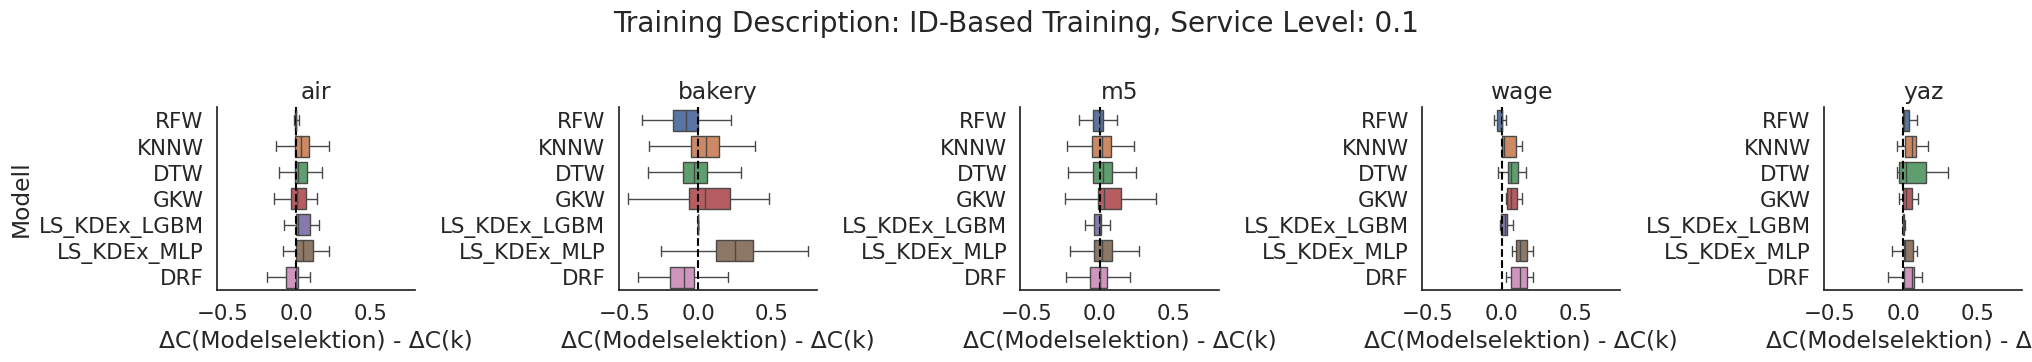

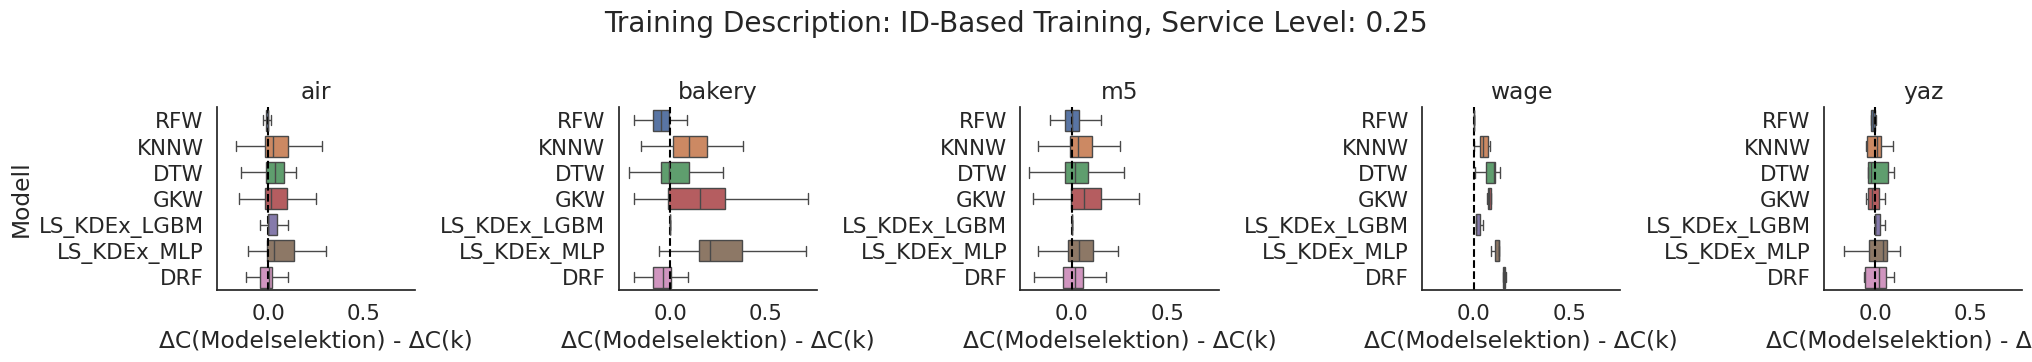

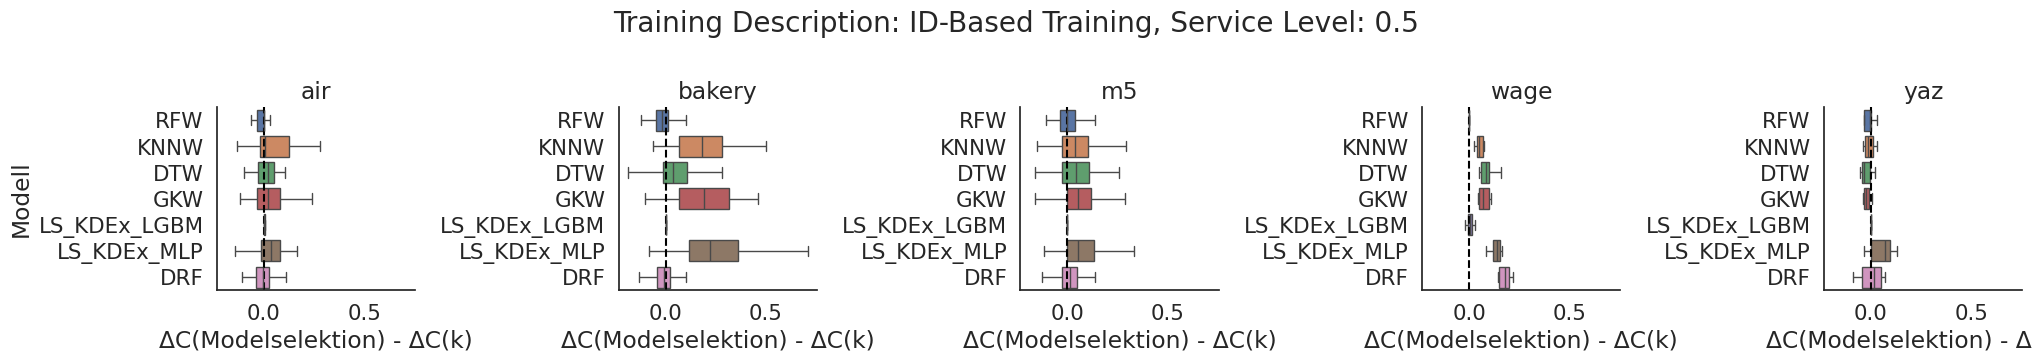

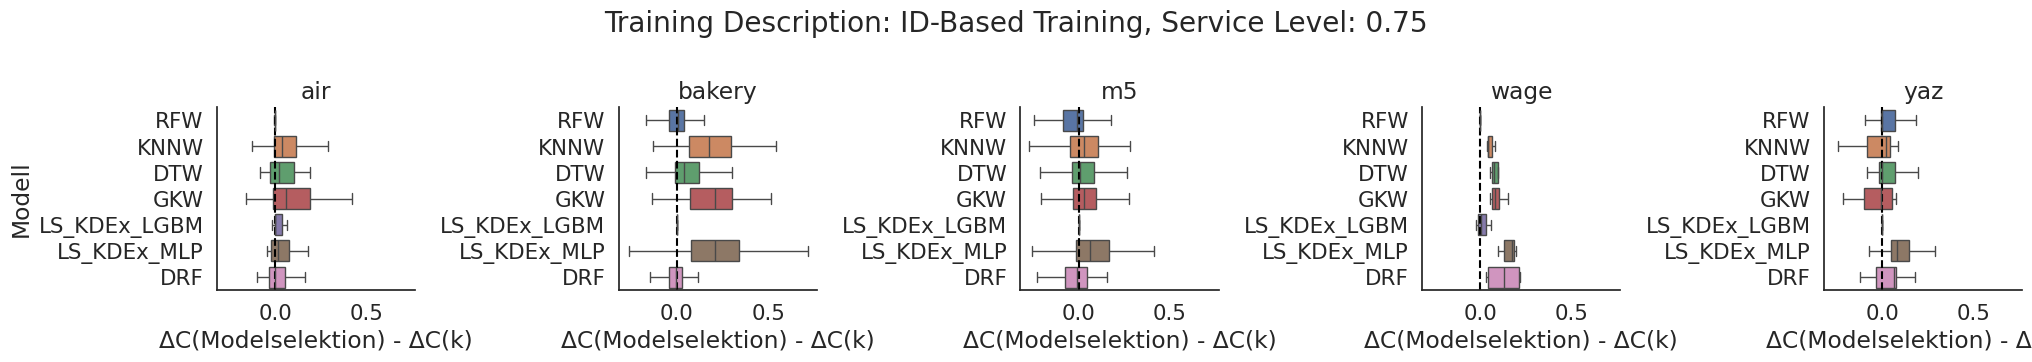

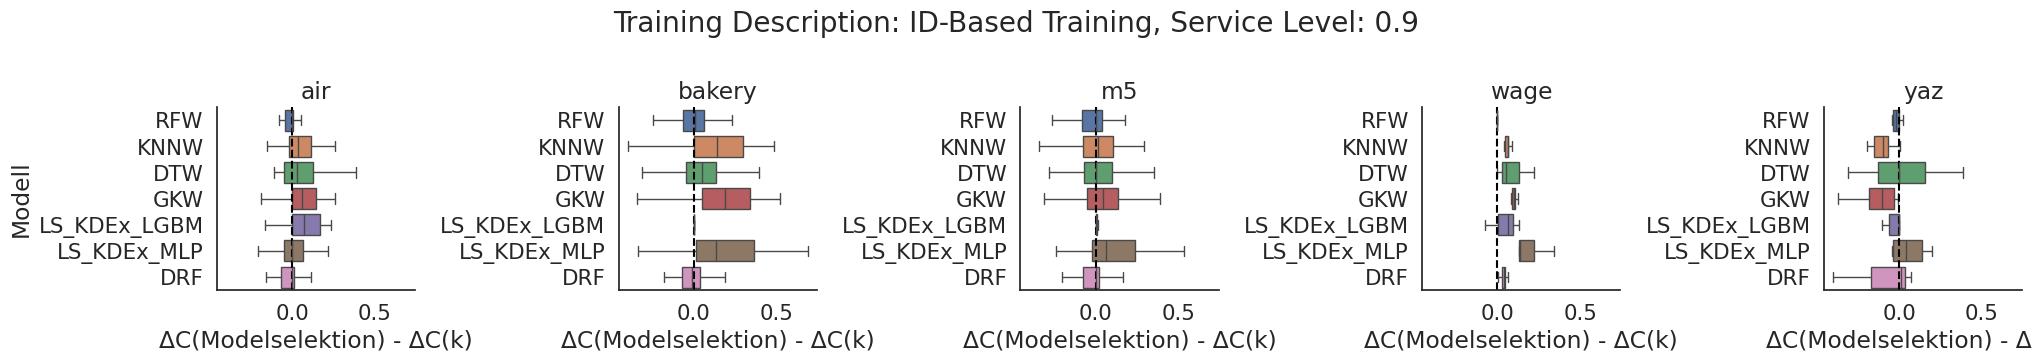

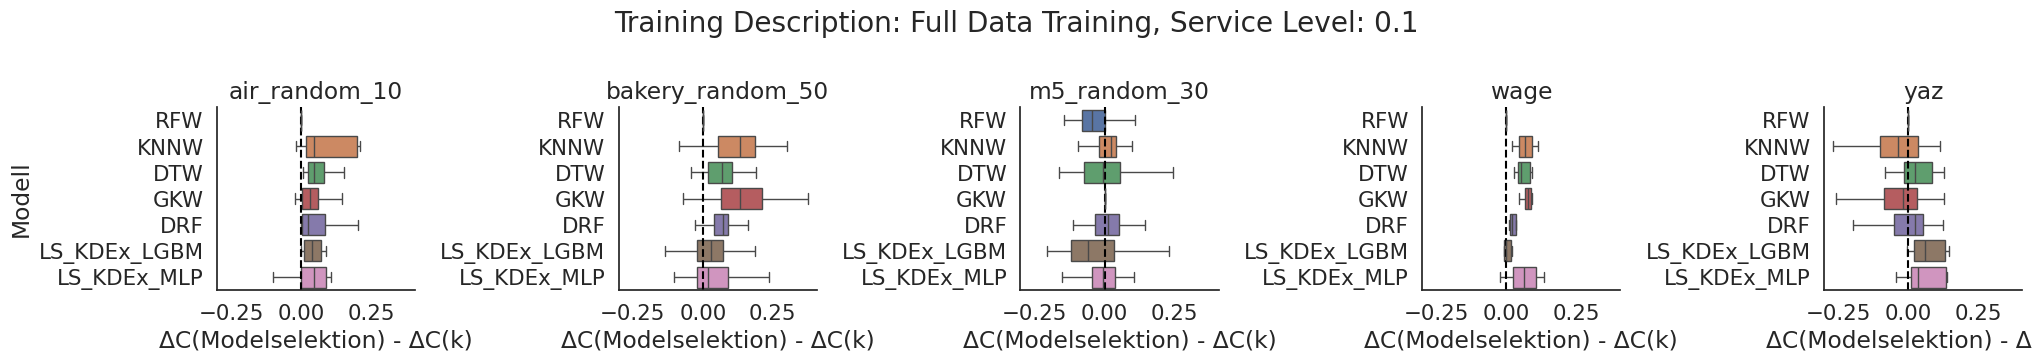

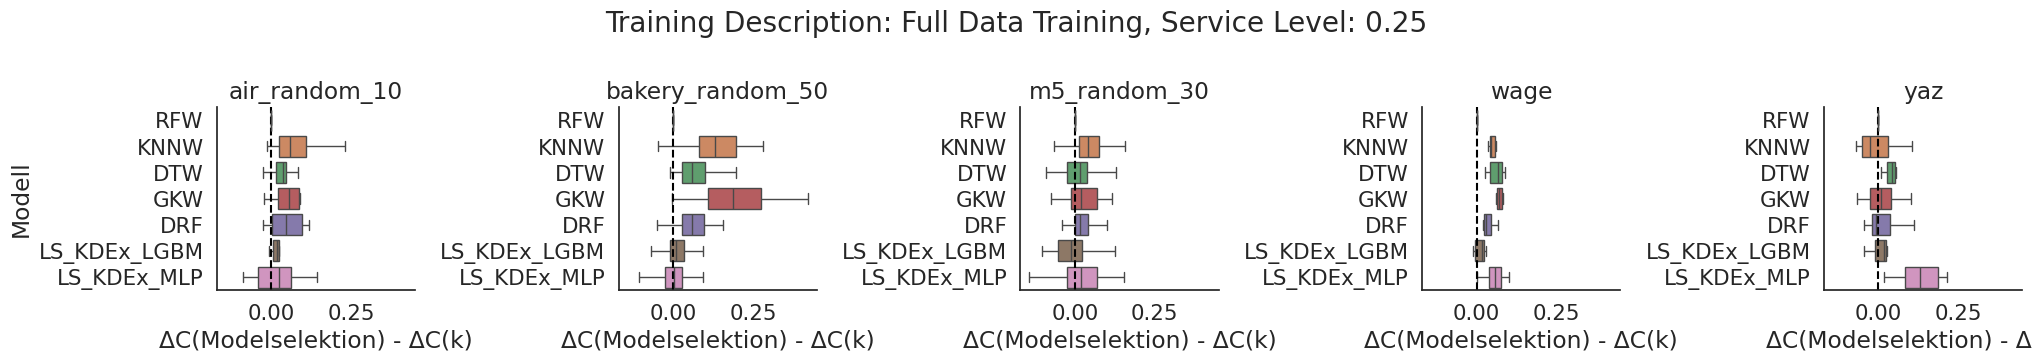

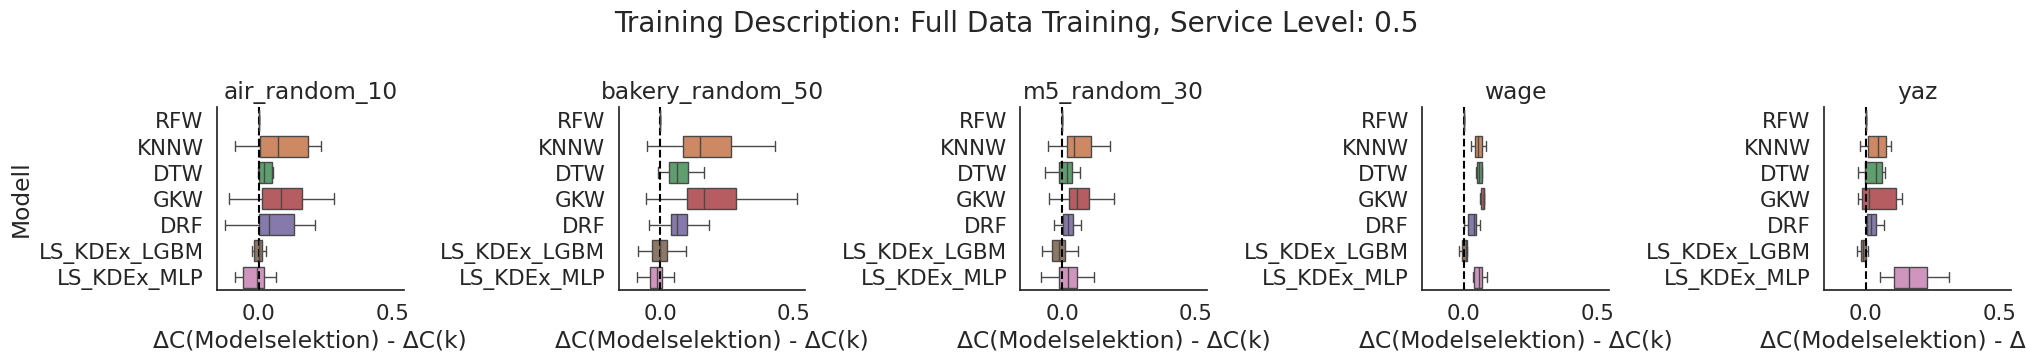

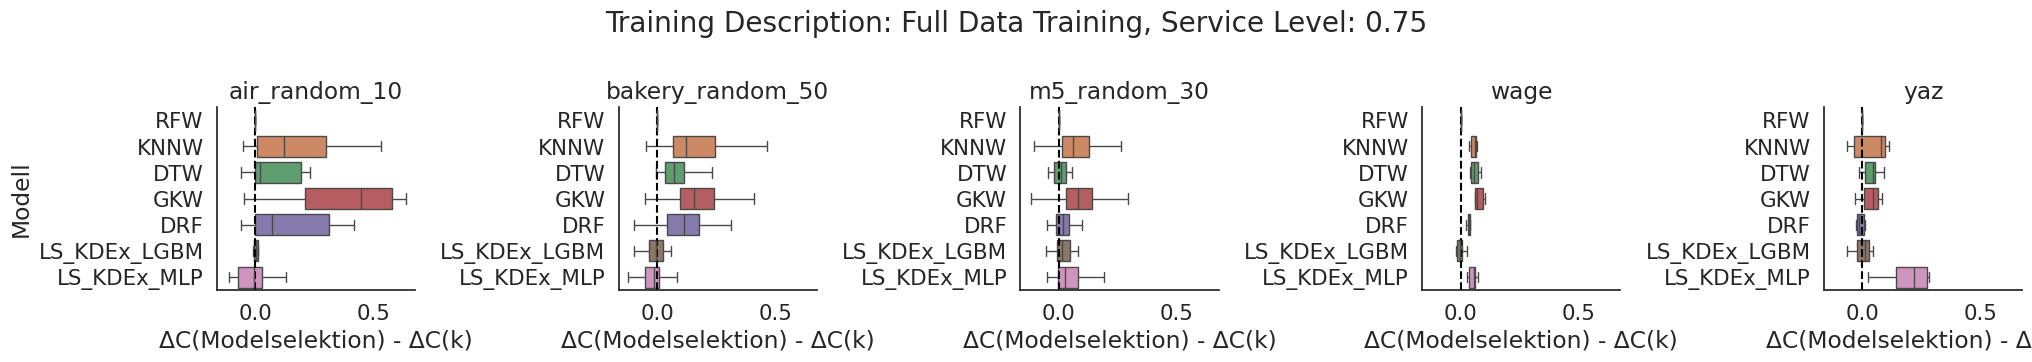

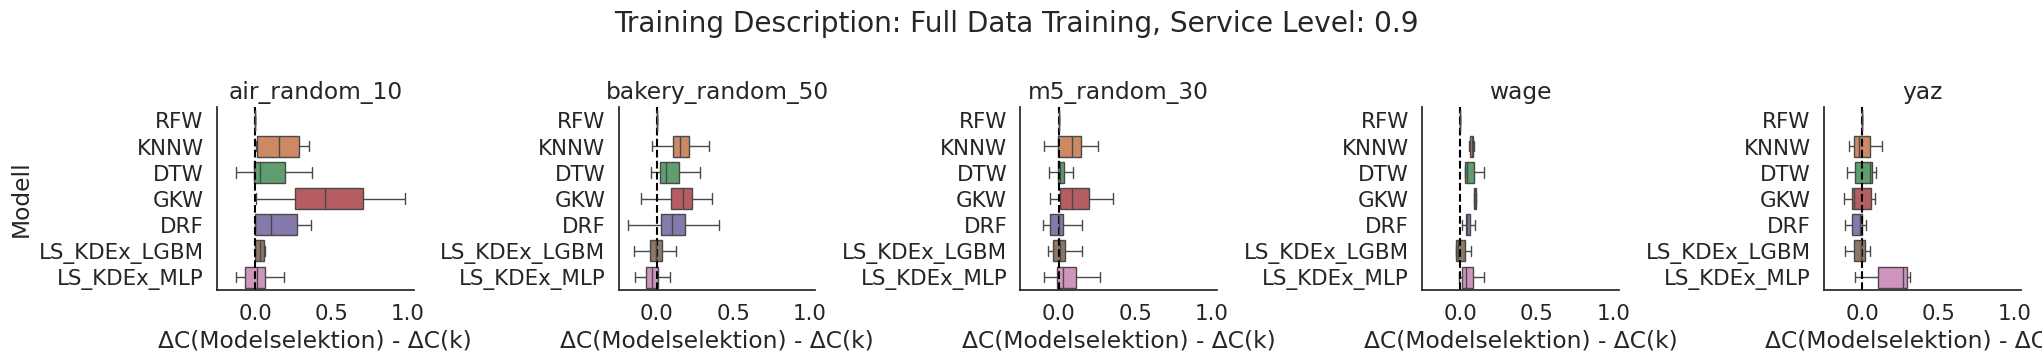

In [35]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Warnungen deaktivieren
warnings.filterwarnings("ignore")

# Ihre spezifischen Modelle
models = ["RFW", "KNNW", "DTW", "GKW", "LS_KDEx_LGBM", "LS_KDEx_MLP", "DRF"]

# Definieren Sie die möglichen Service Levels und Trainingsbeschreibungen
SL_values = [0.1, 0.25, 0.5, 0.75, 0.9]
training_descriptions = ["ID-Based Training", "Full Data Training"]

# Wir gehen davon aus, dass Ihre DataFrames bereits geladen sind:
# final_best_selection_with_test, model_results, cv_results

for training_description in training_descriptions:
    for SL in SL_values:
        # Filtern der Daten für aktuelles Service Level und Trainingsbeschreibung
        final_best_sel = final_best_selection_with_test[
            (final_best_selection_with_test['sl'] == SL) &
            (final_best_selection_with_test['training_description'] == training_description)
        ]

        model_results_sel = model_results[
            (model_results['sl'] == SL) &
            (model_results['training_description'] == training_description)
        ]

        # Überprüfen, ob die gefilterten DataFrames nicht leer sind
        if final_best_sel.empty or model_results_sel.empty:
            continue

        # Bereiten Sie die Daten für die Analyse vor
        model_selection = final_best_sel[['variable', 'dataset', 'delta C']].copy()
        model_selection.rename(columns={'delta C': 'delta_C_model_selection'}, inplace=True)

        model_results_sel = model_results_sel[['variable', 'dataset', 'model_name', 'delta C']].copy()
        model_results_sel.rename(columns={'delta C': 'delta_C_model'}, inplace=True)

        # Zusammenführen der Daten basierend auf 'variable' und 'dataset'
        merged = pd.merge(model_results_sel, model_selection, on=['variable', 'dataset'], how='left')

        # Berechnen der Differenz zwischen Modellselektion und einzelnen Modellen
        merged['∆C(model selection)-∆C(k)'] = merged['delta_C_model_selection'] - merged['delta_C_model']

        # Filtern nach den gewünschten Modellen
        merged = merged[merged['model_name'].isin(models)]

        # Sicherstellen, dass 'dataset' Spalte vorhanden ist und nicht leer
        if 'dataset' in merged.columns and not merged['dataset'].isnull().all():
            datasets = merged['dataset'].unique()
        else:
            datasets = []

        if len(datasets) == 0:
            print(f"Keine Daten zum Plotten für Training Description: {training_description}, Service Level: {SL}")
            continue

        # Visualisierung
        sns.set_theme(style="white", font_scale=1.4)
        g = sns.catplot(
            y="model_name",
            x="∆C(model selection)-∆C(k)",
            data=merged,
            kind="box",
            hue="model_name",
            col="dataset",
            col_order=datasets,
            sharex=True,
            sharey=False,
            dodge=False,
            orient='h',
            showfliers=False,
            height=3.75,
            aspect=1.1,
            legend=False
        )

        # Entfernen der Dataset-Referenz im Titel
        g.set_titles("{col_name}")  # Setzt den Dataset-Namen als Titel jedes Subplots

        # Setzen der Achsenbeschriftungen
        g.set_axis_labels("ΔC(Modelselektion) - ΔC(k)", "Modell")

        # Hinzufügen des übergeordneten Titels mit nur Training Description und Service Level
        plt.subplots_adjust(top=0.85)
        g.fig.suptitle(f"Training Description: {training_description}, Service Level: {SL}")

        for ax in g.axes.flatten():
            ax.axvline(0, color="black", linestyle='--')

        plt.tight_layout()
        plt.show()
        plt.close()

